In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

%matplotlib inline

In [3]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
heart_data_x = heart_data.drop('HeartDisease', axis=1)
heart_data_y = heart_data['HeartDisease']

#heart_data_x = heart_data_x.drop('Sex', axis=1)
heart_data_x_encoded = pd.get_dummies(heart_data_x, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(heart_data_x_encoded, heart_data_y, test_size=0.3)
heart_data_x_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)

In [34]:
acc

0.8768115942028986

In [31]:
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [32]:
print(best_params)
print(best_acc)

criterion: gini, max_depth: 5, min_samples_leaf: 5
0.8876811594202898


In [19]:
predicitions = dtree.predict(X_test)
print(confusion_matrix(y_test, predicitions))
print(accuracy_score(y_test, predicitions))

[[101  35]
 [ 28 112]]
0.7717391304347826


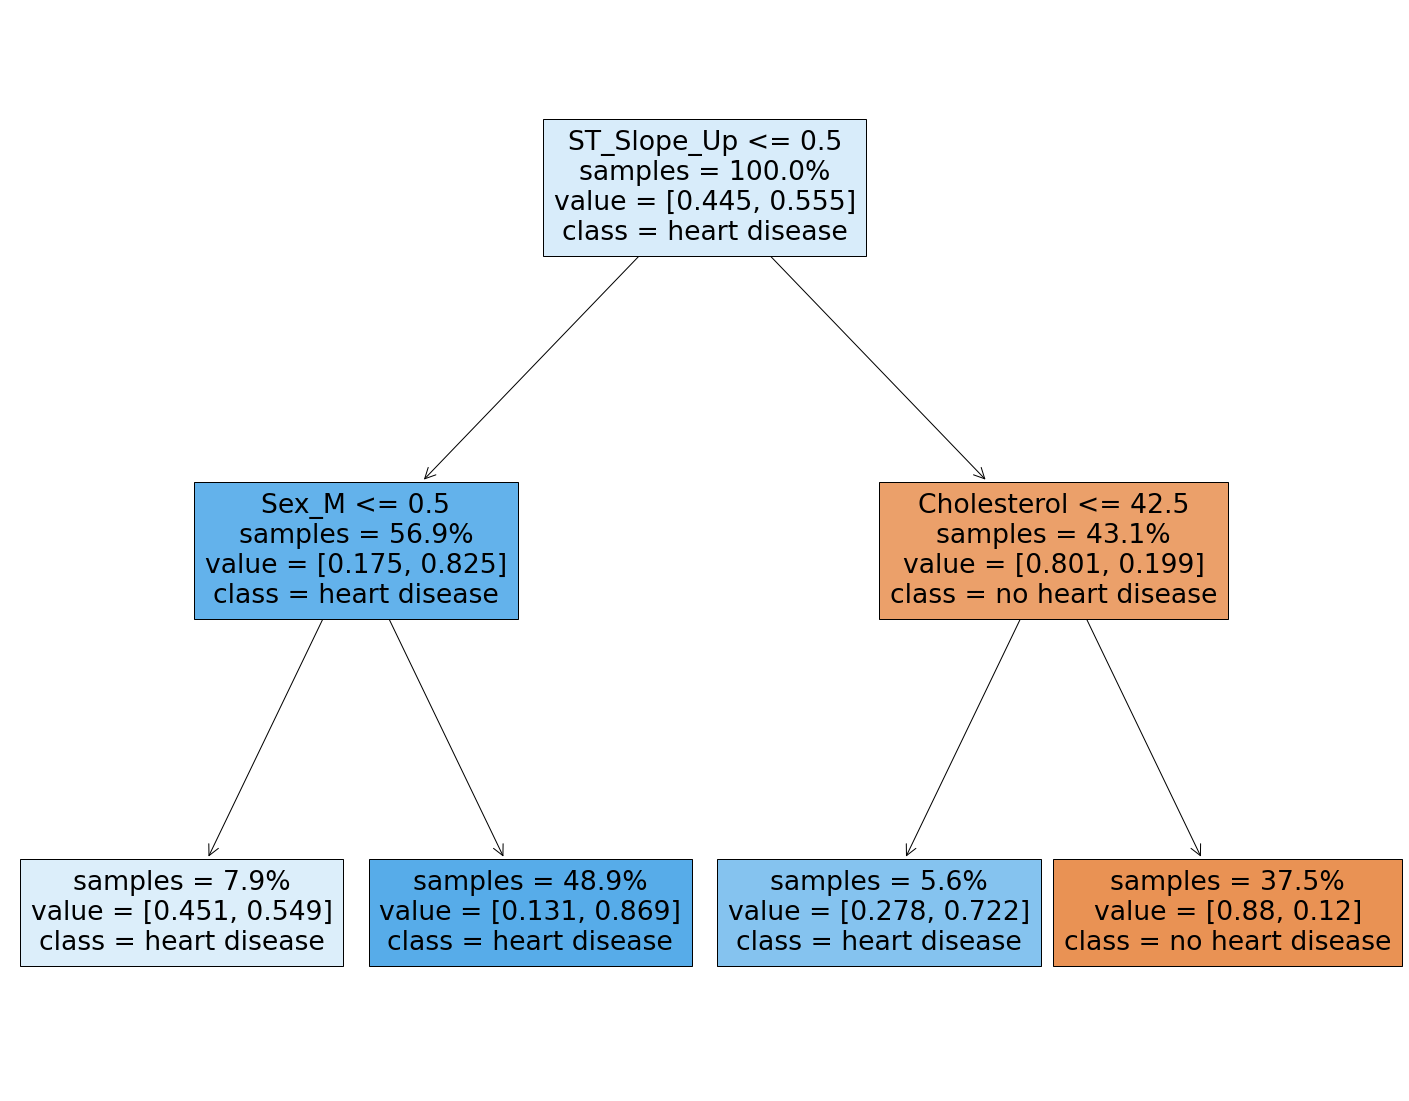

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = heart_data_x_encoded.columns,
            class_names=['no heart disease', 'heart disease'], 
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test.png')

In [ ]:
housing_data = pd.read_csv('housing.csv', header=None, sep='\s+')
housing_data.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_data_x = housing_data.drop('MEDV', axis=1)
house_data_y = housing_data['MEDV']

#heart_data_x = house_data_x.drop('Sex', axis=1)
#house_data_x_encoded = pd.get_dummies(house_data_x, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(house_data_x, house_data_y, test_size=0.3)
house_data_y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [ ]:
dtree = DecisionTreeRegressor(max_depth=2)
dtree.fit(X_train, y_train)

predicitions = dtree.predict(X_test)
#print(confusion_matrix(y_test, predicitions))
print(mean_squared_error(y_test, predicitions))

33.55009452077399


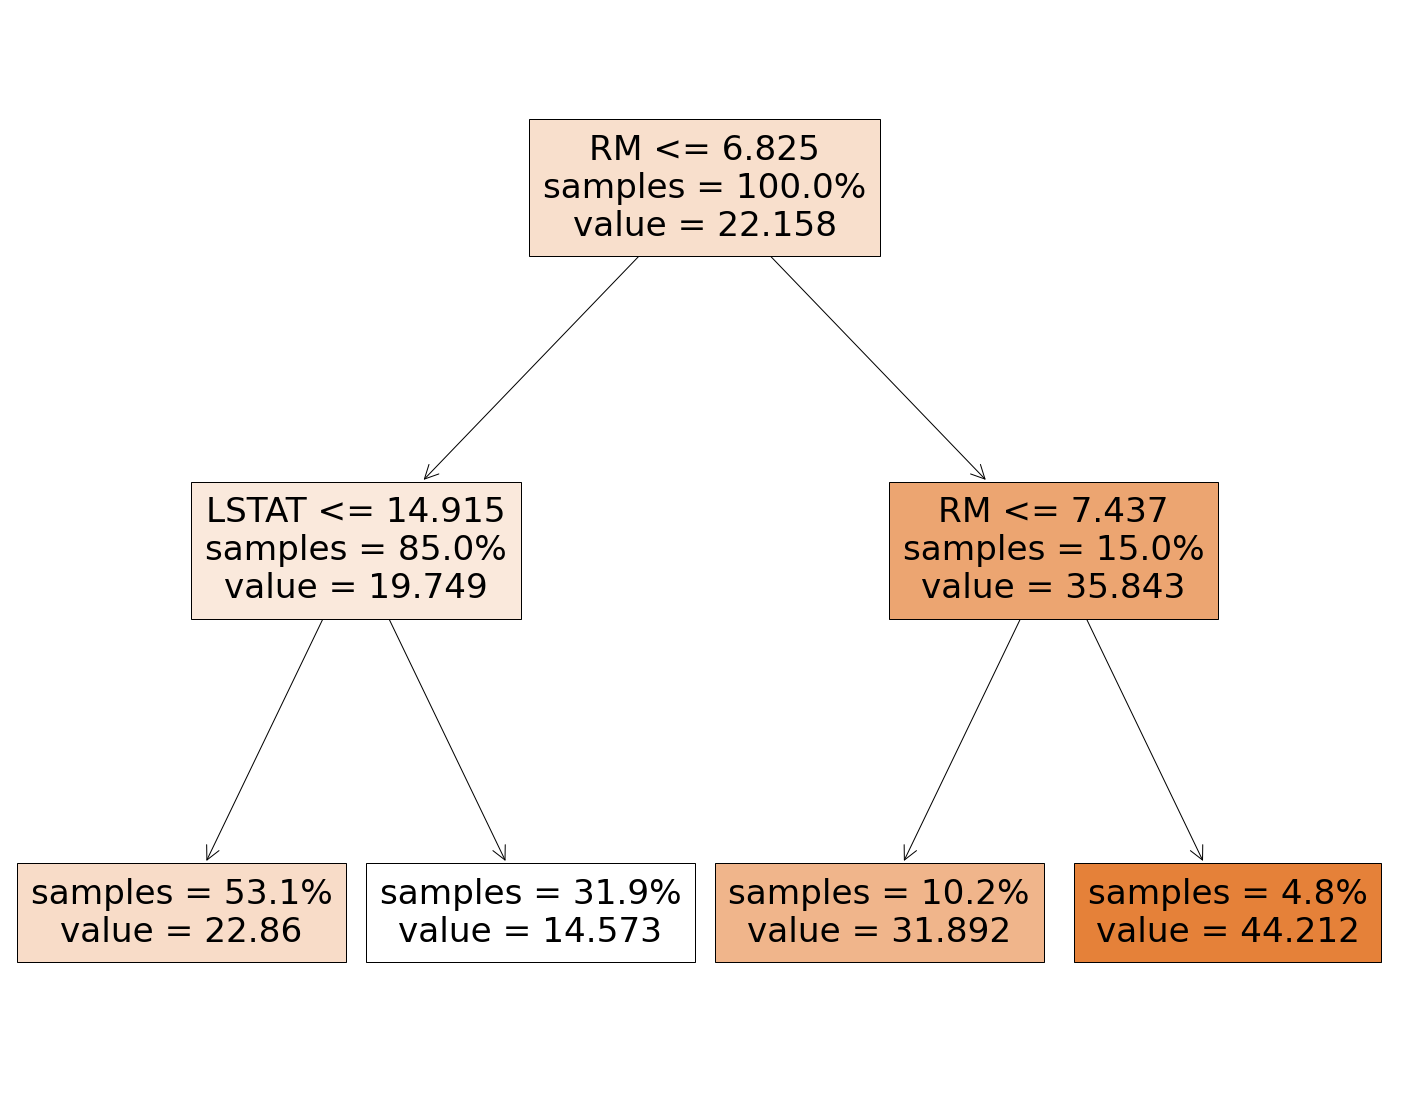

In [ ]:
fig = plt.figure(figsize=((25,20)))
plot_tree(dtree,
            feature_names = house_data_x.columns,
            impurity=False,
            proportion=True,
            filled=True)
fig.savefig('test_house.png')